## 1. Peak finding and tree generation

This notebook illustrates the generation of the tree of peaks from a spectra.


First, Metek MIRA35 observations on the 22nd Aug 2019 from Punta Arenas, Chile are used.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
import pprint

import sys, os
sys.path.append('../')
import peakTree
import peakTree.helpers as h


In [3]:
%matplotlib inline

In [4]:
pTB = peakTree.peakTreeBuffer(config_file='../instrument_config.toml', system='Lacros_Pun')

# the default peak finding settings are loaded from the instrument config.toml file
pTB.settings

{'decoupling': -30,
 'grid_time': 7,
 'max_no_nodes': 15,
 'polarimetry': 'LDR',
 'smooth_cut_sequence': 'sc',
 'station_altitude': 9,
 'peak_finding_params': {'roll_velocity': 3.2,
  'thres_factor_co': 2.5,
  'thres_factor_cx': 3.5,
  'cal_offset': 0,
  'tail_filter': True,
  't_avg': 6,
  'h_avg': 0,
  'span': 0.3,
  'smooth_polyorder': 2,
  'prom_thres': 0.3,
  'width_thres': 0.0}}

keys  dict_keys(['time', 'range', 'velocity', 'Z', 'LDR', 'SNRco'])
time  [1.56646080e+09 1.56646080e+09 1.56646080e+09 1.56646081e+09
 1.56646081e+09 1.56646081e+09 1.56646081e+09 1.56646082e+09
 1.56646082e+09 1.56646082e+09]
range  [155.89599609 187.07519531 218.25439453 249.43359375 280.61279297
 311.79199219 342.97119141 374.15039062 405.32958984 436.50878906]
velocity  [-10.51483491 -10.47360026 -10.43236562 -10.39113097 -10.34989632
 -10.30866168 -10.26742703 -10.22619238 -10.18495774 -10.14372309]
Z chunking  [512, 83, 20]
noise est -62.94 -> -62.94


../peakTree/generate_tree.py:68: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "split_peak_ind_by_space" failed type inference due to: Can't unify return type from the following types: UniTuple(reflected list(reflected list(int64)<iv=None>)<iv=None> x 2), list(reflected list(reflected list(int64)<iv=None>)<iv=None>)<iv=None>
Return of: IR name '$20return_value.3', type 'list(reflected list(reflected list(int64)<iv=None>)<iv=None>)<iv=None>', location: 
File "../peakTree/generate_tree.py", line 79:
def split_peak_ind_by_space(peak_ind):
    <source elided>
    if len(peak_ind) == 1:
        return [peak_ind, peak_ind]
        ^
Return of: IR name '$126return_value.52', type 'UniTuple(reflected list(reflected list(int64)<iv=None>)<iv=None> x 2)', location: 
File "../peakTree/generate_tree.py", line 84:
def split_peak_ind_by_space(peak_ind):
    <source elided>
    split_i = np.argmax(spacing)
    return peak_ind[:split_i+1], peak_ind[

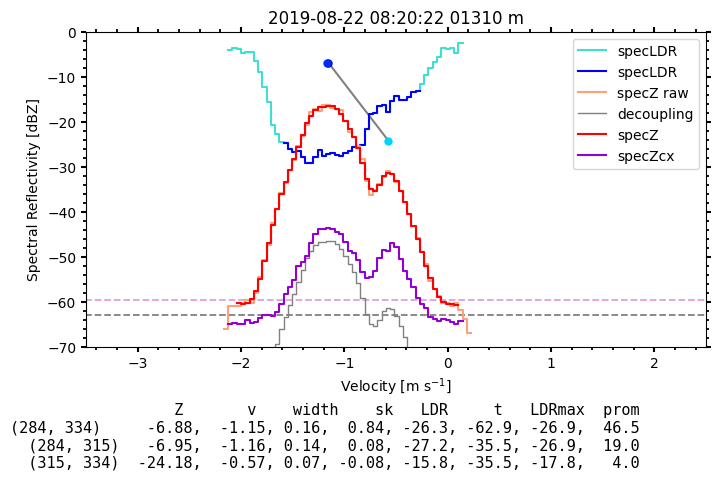

In [5]:
pTB.load('../data/D20190822_T0800_0900_Pun_zspc2nc_v2.0_standard.nc4')
# pTB.settings['thres_factor_co'] = 6


# First, just look at one single spectrum,
# later include more into the run

specs = [
    (h.dt_to_ts(datetime.datetime(2019, 8, 22, 8, 20, 22)), 1300),
    #(h.dt_to_ts(datetime.datetime(2019, 8, 22, 8, 20, 22)), 1400),
    #(h.dt_to_ts(datetime.datetime(2019, 8, 22, 8, 20, 22)), 1650),
    #(h.dt_to_ts(datetime.datetime(2019, 8, 22, 8, 20, 22)), 1700),
]

plot_path = 'plots/'
if not os.path.isdir(plot_path):
    os.mkdir(plot_path)
    
for ts, rg in specs:
    tree, spectrum = pTB.get_tree_at(ts, rg)
      
    
    fig, ax = peakTree.print_tree.plot_spectrum(tree, spectrum, None)
    ax.set_xlim([-3.5, 2.5])
    ax.set_ylim([-70, 0])
       
    dt=h.ts_to_dt(spectrum['ts'])
    savename = '{}_{:0>5.0f}m_spectrum.png'.format(dt.strftime('%Y-%m-%d_%H%M%S'), spectrum['range'])
#   fig.savefig(plot_path + savename, dpi=250)

lasttree = tree

### Reminder binary tree structure

<br />
<div>
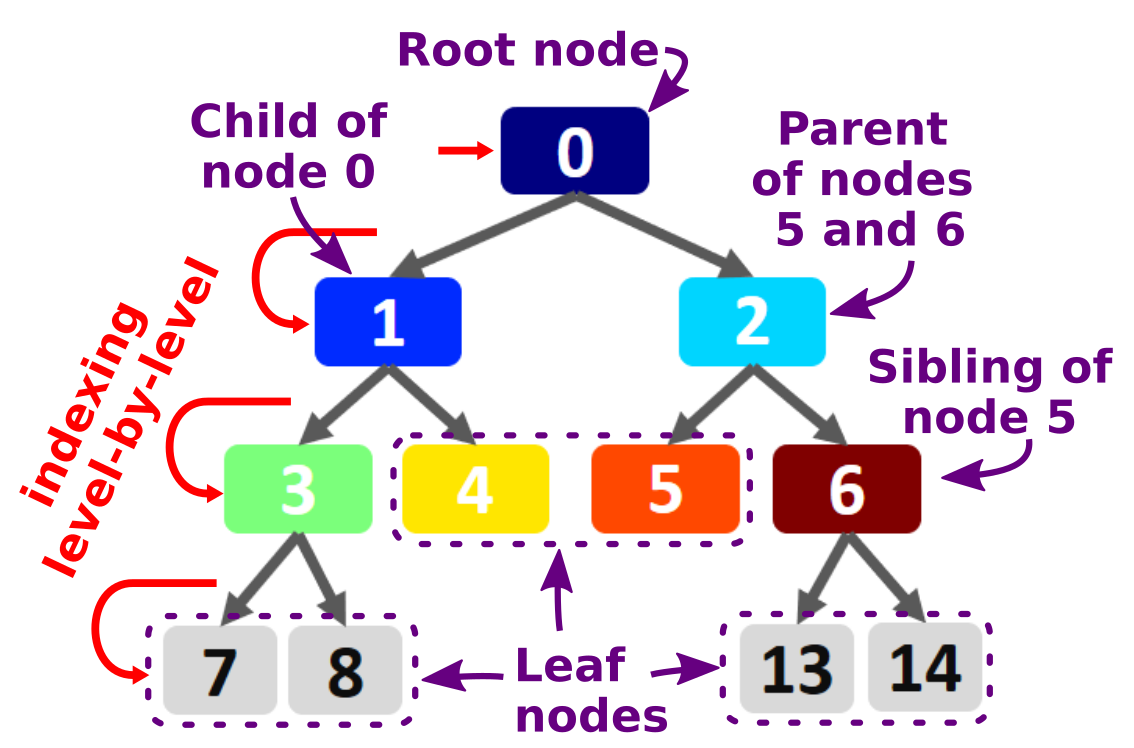
</div>

In [6]:
# How is the tree stored internally?

pprint.pprint(lasttree)

{0: {'bounds': (284, 334),
     'coords': [0],
     'ldr': 0.0023525891951065307,
     'ldrleft': 0.0018298281,
     'ldrmax': 0.002024356,
     'ldrmin': 0.002024356,
     'ldrright': 0.0031238643,
     'parent_id': -1,
     'prominence': 44493.12500627125,
     'skew': 0.8378418494840817,
     'thres': 5.081051668298642e-07,
     'v': -1.1538336755395315,
     'width': 0.1620914608789845,
     'z': 0.20520067888701204},
 1: {'bounds': (284, 315),
     'coords': [0, 0],
     'ldr': 0.0019268659710329253,
     'ldrleft': 0.0021442627,
     'ldrmax': 0.002024356,
     'ldrmin': 0.002024356,
     'ldrright': 0.002404924,
     'parent_id': 0,
     'prominence': 79.50115878753351,
     'skew': 0.07620103702907449,
     'thres': 0.00028436298349450553,
     'v': -1.1634777072405418,
     'width': 0.13950380502723828,
     'z': 0.20166154222796714},
 2: {'bounds': (315, 334),
     'coords': [0, 1],
     'ldr': 0.026004774895648654,
     'ldrleft': 0.035302103,
     'ldrmax': 0.016411623,
   

noise est -62.94 -> -62.94


../peakTree/generate_tree.py:804: RuntimeWarning: invalid value encountered in true_divide
  moments, _ = calc_moments(spectrum, traversed[i]['bounds'], traversed[i]['thres'])


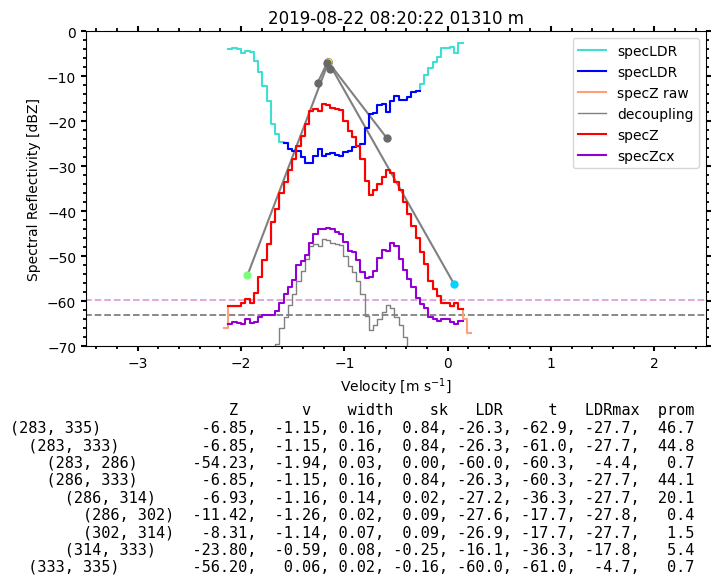

In [7]:
# let's modify some of the settings
# The original settings (see above) as a reminder:
# 'peak_finding_params': {
#   'roll_velocity': 3.2,
#   'thres_factor_co': 2.5,
#   'thres_factor_cx': 3.5,
#   'cal_offset': 0,
#   'tail_filter': True,
#   't_avg': 6,             [s]
#   'h_avg': 0,             [m]
#   'span': 0.3,            [m s^-1]
#   'smooth_polyorder': 2,
#   'prom_thres': 0.3,      [dB]
#   'width_thres': 0.0      [m s^-1]   
#    }
pTB.settings['peak_finding_params']['span'] = 0.1
pTB.settings['peak_finding_params']['prom_thres'] = 0.1

for ts, rg in specs:
    tree, spectrum = pTB.get_tree_at(ts, rg)
    
    fig, ax = peakTree.print_tree.plot_spectrum(tree, spectrum, None)
    ax.set_xlim([-3.5, 2.5])
    ax.set_ylim([-70, 0])
       
    dt=h.ts_to_dt(spectrum['ts'])
    savename = '{}_{:0>5.0f}m_spectrum.png'.format(dt.strftime('%Y-%m-%d_%H%M%S'), spectrum['range'])
#   fig.savefig(plot_path + savename, dpi=250)

### Exercises

- experiment with different peak finding parameters
- try the same for the colocated RPG FMCW94 spectra
- try the peak finding parameters obtained with peako